# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0 

In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Jumlah Baris & Kolom :", df.shape)
print("\nTipe Data :")
print(df.dtypes)
print(df.info())

Jumlah Baris & Kolom : (2537, 16)

Tipe Data :
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                float64
CustomerOccupation          object
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print(df.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
kolerasi = df.corr(numeric_only=True)
print(kolerasi)

                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.024428             0.004782   
CustomerAge                  -0.024428     1.000000            -0.009852   
TransactionDuration           0.004782    -0.009852             1.000000   
LoginAttempts                -0.007397     0.007876             0.030076   
AccountBalance               -0.026310     0.321161             0.006859   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.007397       -0.026310  
CustomerAge               0.007876        0.321161  
TransactionDuration       0.030076        0.006859  
LoginAttempts             1.000000        0.009088  
AccountBalance            0.009088        1.000000  


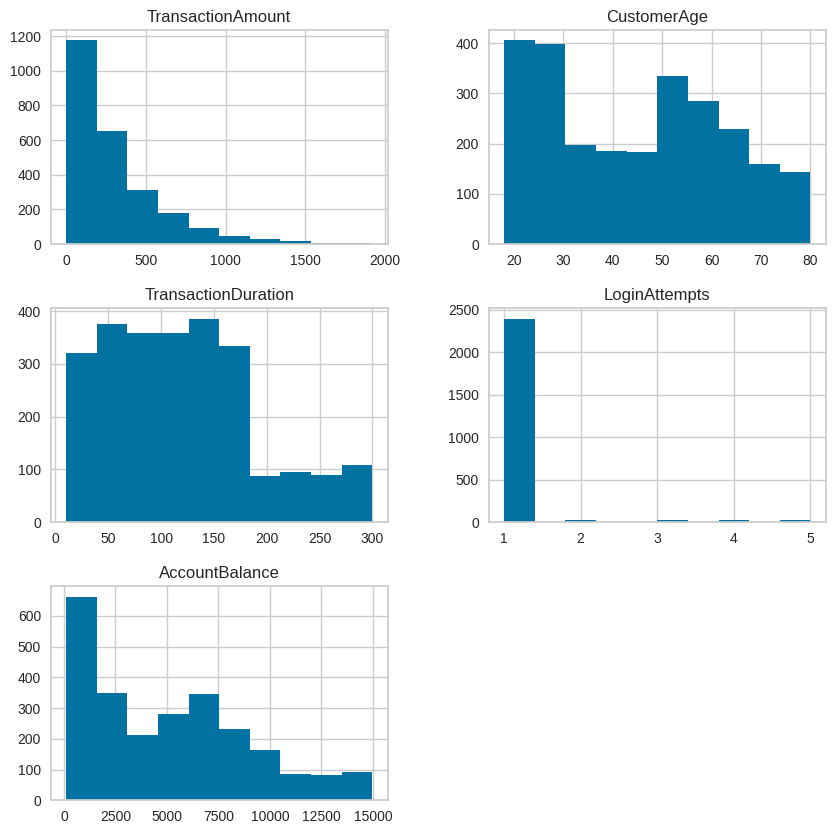

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(10, 10))
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print(df.duplicated().sum())

21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numeric = df.select_dtypes(include=['number'])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric)
scaled_df = pd.DataFrame(scaled_data, columns=numeric.columns)
df_final = pd.concat([scaled_df, df.select_dtypes(exclude=['number'])], axis=1)
print(df_final)

      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.007207     0.838710             0.244828            0.0   
1              0.195940     0.806452             0.451724            0.0   
2              0.065680     0.016129             0.158621            0.0   
3              0.096016     0.129032             0.051724            0.0   
4              0.006874          NaN             0.648276            0.0   
...                 ...          ...                  ...            ...   
2532           0.119770     0.983871             0.393103            0.0   
2533           0.292529     0.758065             0.044828            0.0   
2534           0.256847     0.564516             0.779310            0.0   
2535           0.103374     0.145161             0.255172            0.0   
2536           0.003768     0.758065             0.917241            0.0   

      AccountBalance TransactionID AccountID      TransactionDate  \
0           0.3368

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_final = df_final.drop(columns=['TransactionID', 'AccountID', 'MerchantID', 'DeviceID', 'IP Address'])
print(df_final)

      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.007207     0.838710             0.244828            0.0   
1              0.195940     0.806452             0.451724            0.0   
2              0.065680     0.016129             0.158621            0.0   
3              0.096016     0.129032             0.051724            0.0   
4              0.006874          NaN             0.648276            0.0   
...                 ...          ...                  ...            ...   
2532           0.119770     0.983871             0.393103            0.0   
2533           0.292529     0.758065             0.044828            0.0   
2534           0.256847     0.564516             0.779310            0.0   
2535           0.103374     0.145161             0.255172            0.0   
2536           0.003768     0.758065             0.917241            0.0   

      AccountBalance      TransactionDate TransactionType          Location  \
0       

In [13]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
le = LabelEncoder()
df_final['TransactionType'] = le.fit_transform(df['TransactionType'])
df_final['Channel'] = le.fit_transform(df['Channel'])
df_final['CustomerOccupation'] = le.fit_transform(df['CustomerOccupation'])

df_final = pd.get_dummies(df_final, columns=['Location'])
print(scaled_df)

      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.007207     0.838710             0.244828            0.0   
1              0.195940     0.806452             0.451724            0.0   
2              0.065680     0.016129             0.158621            0.0   
3              0.096016     0.129032             0.051724            0.0   
4              0.006874          NaN             0.648276            0.0   
...                 ...          ...                  ...            ...   
2532           0.119770     0.983871             0.393103            0.0   
2533           0.292529     0.758065             0.044828            0.0   
2534           0.256847     0.564516             0.779310            0.0   
2535           0.103374     0.145161             0.255172            0.0   
2536           0.003768     0.758065             0.917241            0.0   

      AccountBalance  
0           0.336832  
1           0.918055  
2           0.0686

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [14]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_final = df_final.dropna()

In [15]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_final = df_final.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [16]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [17]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [18]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

print(df.describe())

print("\n")

print("DataFrame setelah scaling :")
print(df_final.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


DataFrame setelah scaling :
       TransactionAmount  CustomerAge  TransactionDuration  

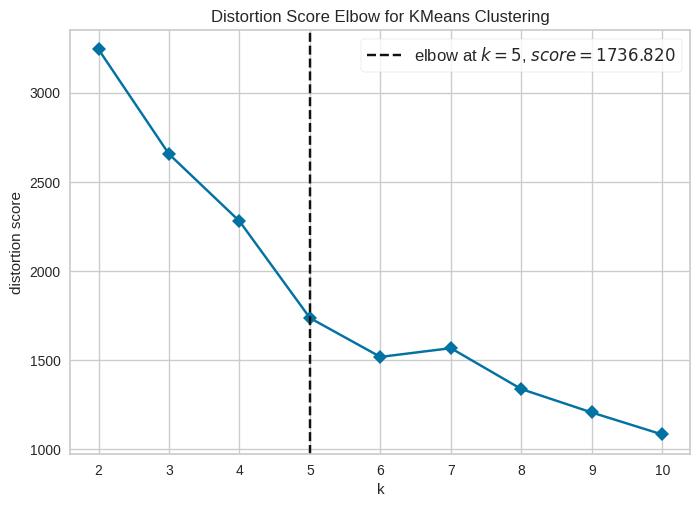

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
df_fix = df_final.select_dtypes(include='number')
kmeans = KMeans()
K_range = range(2, 11)
visualizer = KElbowVisualizer(kmeans, k=K_range, timings=False)
visualizer.fit(df_fix)
visualizer.show()

In [20]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=5, random_state=42)
model_kmeans.fit(df_fix)
df_fix['Target'] = model_kmeans.labels_
print(df_fix)

      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.007207     0.838710             0.244828            0.0   
1              0.195940     0.806452             0.451724            0.0   
2              0.065680     0.016129             0.158621            0.0   
3              0.096016     0.129032             0.051724            0.0   
5              0.047888     0.000000             0.558621            0.0   
...                 ...          ...                  ...            ...   
2510           0.096782     0.080645             0.031034            0.0   
2511           0.126545     0.096774             0.286207            0.0   
2523           0.006212     0.935484             0.231034            0.0   
2524           0.120833     0.306452             0.141379            0.0   
2535           0.103374     0.145161             0.255172            0.0   

      AccountBalance  TransactionType  Channel  CustomerOccupation  Target  
0         

Jalankan cell code ini untuk menyimpan model kamu.

In [21]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

from google.colab import files
files.download('model_clustering.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [22]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_fix, model_kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.552026586044309


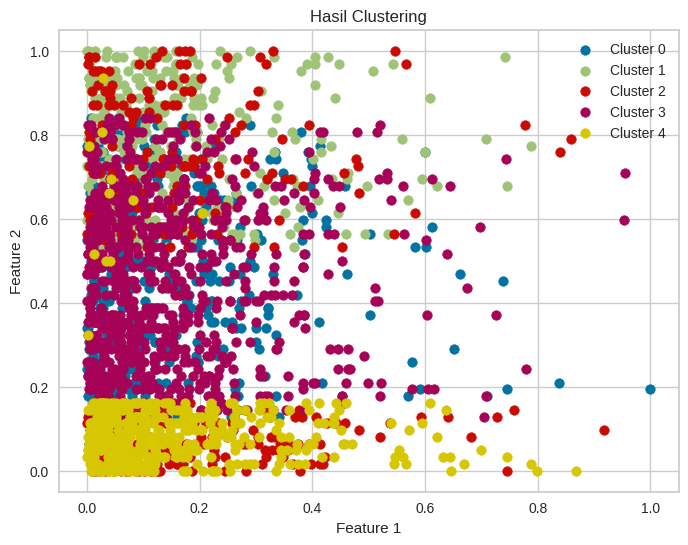

In [23]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_data = df_fix[df_fix['Target'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hasil Clustering')
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

           PC1       PC2  Target
0    -2.879539 -0.233399       0
1    -2.916054 -0.308358       0
2     2.485087  0.385899       4
3     2.441365  0.314609       4
4     0.193022  1.777965       2
...        ...       ...     ...
2343  2.476613  0.377286       4
2344  2.518568  0.347001       4
2345 -0.873888  0.786000       1
2346 -2.403454  0.633920       0
2347  2.200500  0.710450       4

[2348 rows x 3 columns]


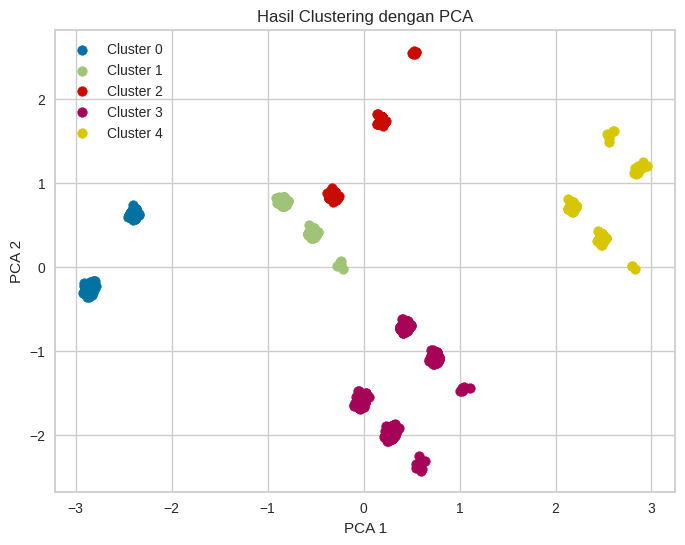

In [24]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_fix)
pca_result = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
pca_result['Target'] = model_kmeans.labels_
print(pca_result)

plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_data = pca_result[pca_result['Target'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hasil Clustering dengan PCA')
plt.legend()
plt.show()

In [25]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

joblib.dump(pca, "PCA_model_clustering.h5")

from google.colab import files
files.download('PCA_model_clustering.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [26]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

kolom_numerik = df_fix.drop(columns='Target').select_dtypes(include='number').columns
kolom_kategorikal = df_fix[['TransactionType', 'Channel', 'CustomerOccupation']].columns

agregasi_numerik = df_fix.groupby('Target')[kolom_numerik].agg(['mean', 'min', 'max'])
print(agregasi_numerik)

for col in kolom_kategorikal:
    agregasi_kategorikal = df_fix.groupby('Target')[col].agg(pd.Series.mode)
    print(agregasi_kategorikal)


       TransactionAmount                     CustomerAge                      \
                    mean       min       max        mean       min       max   
Target                                                                         
0               0.151318  0.000031  1.000000    0.469325  0.129032  0.838710   
1               0.151384  0.000495  0.787164    0.769887  0.532258  1.000000   
2               0.165364  0.000313  0.918269    0.403390  0.000000  1.000000   
3               0.150662  0.000099  0.954092    0.445950  0.129032  0.838710   
4               0.156822  0.000000  0.867223    0.097613  0.000000  0.935484   

       TransactionDuration                     LoginAttempts  ...  \
                      mean       min       max          mean  ...   
Target                                                        ...   
0                 0.385622  0.003448  1.000000      0.039125  ...   
1                 0.379592  0.003448  0.986207      0.040872  ...   
2             



Modus Kategorikal :


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

<Figure size 1000x600 with 0 Axes>

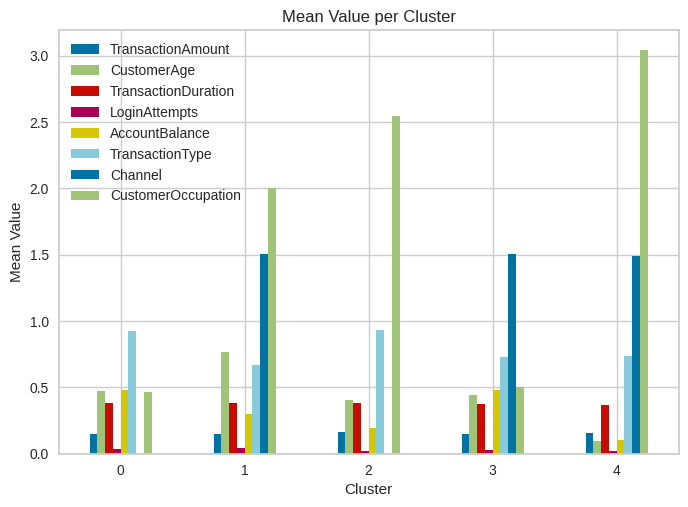

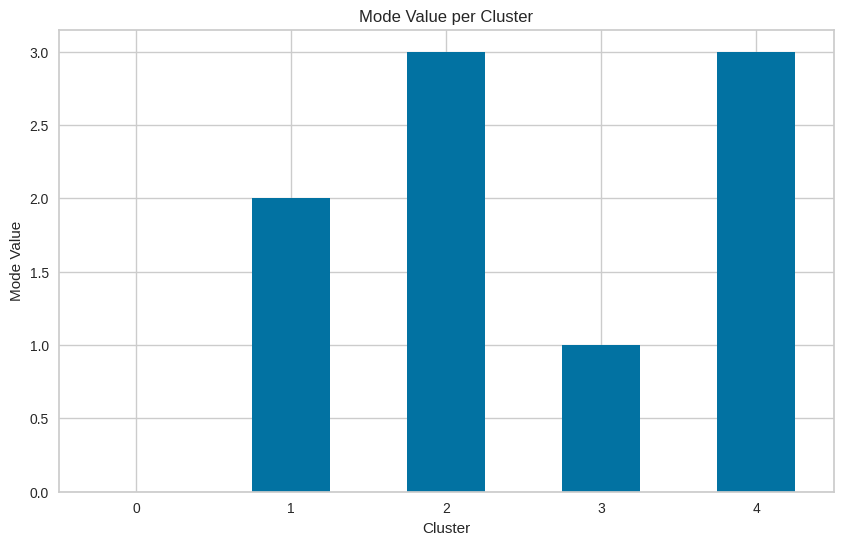

In [27]:
mean_per_cluster = df_fix.groupby('Target')[kolom_numerik].mean()
plt.figure(figsize=(10, 6))
mean_per_cluster.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Value per Cluster')
plt.xticks(rotation=0)

print("\n")

print("Modus Kategorikal :")
for col in kolom_kategorikal:
    mode_per_cluster = df_fix.groupby('Target')[col].agg(pd.Series.mode)
plt.figure(figsize=(10, 6))
mode_per_cluster.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Mode Value')
plt.title('Mode Value per Cluster')
plt.xticks(rotation=0)

In [28]:
kolom_numerik = df_fix.drop(columns='Target').select_dtypes(include='number').columns
scaler = MinMaxScaler()
scaler.fit(df_fix[kolom_numerik])

df_inverse = pd.DataFrame(scaler.inverse_transform(df_fix[kolom_numerik]), columns=kolom_numerik)
df_inverse['Target'] = df_fix['Target']
print(df_inverse)

print("\n")
print("Rata-rata nilai asli per cluster:")
print(df_inverse.groupby('Target')[kolom_numerik].mean())

      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.007207     0.838710             0.244828            0.0   
1              0.195940     0.806452             0.451724            0.0   
2              0.065680     0.016129             0.158621            0.0   
3              0.096016     0.129032             0.051724            0.0   
4              0.047888     0.000000             0.558621            0.0   
...                 ...          ...                  ...            ...   
2343           0.096782     0.080645             0.031034            0.0   
2344           0.126545     0.096774             0.286207            0.0   
2345           0.006212     0.935484             0.231034            0.0   
2346           0.120833     0.306452             0.141379            0.0   
2347           0.103374     0.145161             0.255172            0.0   

      AccountBalance  TransactionType  Channel  CustomerOccupation  Target  
0         

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
**Cluster 0 :** <br>
**Rata-rata (mean)**
- TransactionAmount : min 0.15 - 1.00
- Customer Age : sekitar 47 tahun
- Transaction Durasi : 0.38
- TransactiohType : Debit
- Channel : 0
- CustomerOccupation : 0.46

**Analisis :** cluster ini rata penggunanya dengan usia yang dewasa dan mempunyai saldo yang besar serta bertransaksi debit via ATM. Cenderung aktif login dengan finansial yang stabil


**Cluster 1 :** <br>
**Rata-rata (mean)**
- TransactionAmount : 0.15
- Customer Age : Tertua (0.77)
- Transaction Durasi : 0.37
- TransactiohType : Debit
- Channel : 1.5 (Online)
- CustomerOccupation : 2

**Analisis** : rata-rata usia sudah lanjut, memiliki kecenderungan transaksi debit via online. Mungkin cocok jika diberik layanan khusus untuk usia lanjut(pensiun)


**Cluster 2 :** <br>
**Rata-rata (mean)**
- TransactionAmount : 0.16
- Customer Age : 0.40
- Transaction Durasi : 0.38
- TransactiohType : Debit
- Channel : Atm (0)
- CustomerOccupation : 2.5

**Analisis :** Cluster ini rata-rata pelajar atau mahasiswa yang lebih aktif dalam bertransaksi (atm).

**Cluster 3 :**<br>
**Rata-rata (mean)**
- TransactionAmount : 0.15
- Customer Age : 0.44
- Transaction Durasi : 0.38
- TransactiohType : 1 (Debit)
- Channel : 0 (online)
- CustomerOccupation : 0.5

**Analisis :** cluster ini rentang usia dewasa atau orang-orang yang bekerja karena memiliki saldo yang tinggi yang sering bertransaksi melalui digital.

**Cluster 4 :**<br>
**Rata-rata (mean)**
- TransactionAmount : 0.16
- Customer Age : 0.09
- Transaction Durasi : 0.36
- TransactiohType : 0 (Credit)
- Channel : 1.4
- CustomerOccupation : 3

**Analisis :** cluster ini pengguna rata-rata pengguna seorang palajar. Transaksi yang paling rendah dari cluster lainnya.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_fix['Target'] = model_kmeans.labels_
print("Kolom saat ini:", df_fix.columns)

Kolom saat ini: Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionType', 'Channel',
       'CustomerOccupation', 'Target'],
      dtype='object')


In [30]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_fix.to_csv('data_clustering.csv', index=False)

from google.colab import files
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [32]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [33]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)